<a href="https://colab.research.google.com/github/AlbertoGhub/Machine-Learning-and-Data-Science-Projects/blob/main/Outliers_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data frame: https://github.com/Safa1615/BIKE-RENTAL-COUNT/blob/24299fe2942aa6ebaf5482d0713a1ec26bd217e1/day.csv

In [1]:
# Colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Load DF from a URL
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Importing data frame
df = pd.read_csv("/content/drive/MyDrive/MI_PERSONAL_PROJECT/Outliers/Raw_data.csv")
df.drop(columns="Unnamed: 0", inplace = True)
df.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510


In [4]:
# Checking the shape and type
df.info()
# SInce there are not nulls, then, no reason to run isnull

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Checking duplicates
df.duplicated().sum()

0

In [6]:
# Checking the data frame the dteday is 
df["dteday"] = pd.to_datetime(df["dteday"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
# Checking the data frame again
df.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510


In [8]:
# Stats
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Let's divide this into:

num_col = df.select_dtypes(include = ["int64", "float64"])

print(f"The number of columns is {len(num_col.columns)}. Let's divide it in to group of 5 plots, bearing in mind the scales")


# Adding the columns to plot in group

gr_1 = num_col.iloc[:, 0:5]
gr_2 = num_col.iloc[:, 5:10]
gr_3 = num_col.iloc[:, 10:15]

# print(f"{gr_1.columns}\n{gr_2.columns}\n{gr_3.columns}")

The number of columns is 15. Let's divide it in to group of 5 plots, bearing in mind the scales


In [10]:
num_col

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [11]:
# Checking outliers

def boxplot_outliers(data_to_plot):
  """BOXPLOT GRAPH"""
  data_to_plot.plot(kind = "box",
                    subplots = True,
                    sharey = False, 
                    figsize = (15, 8))

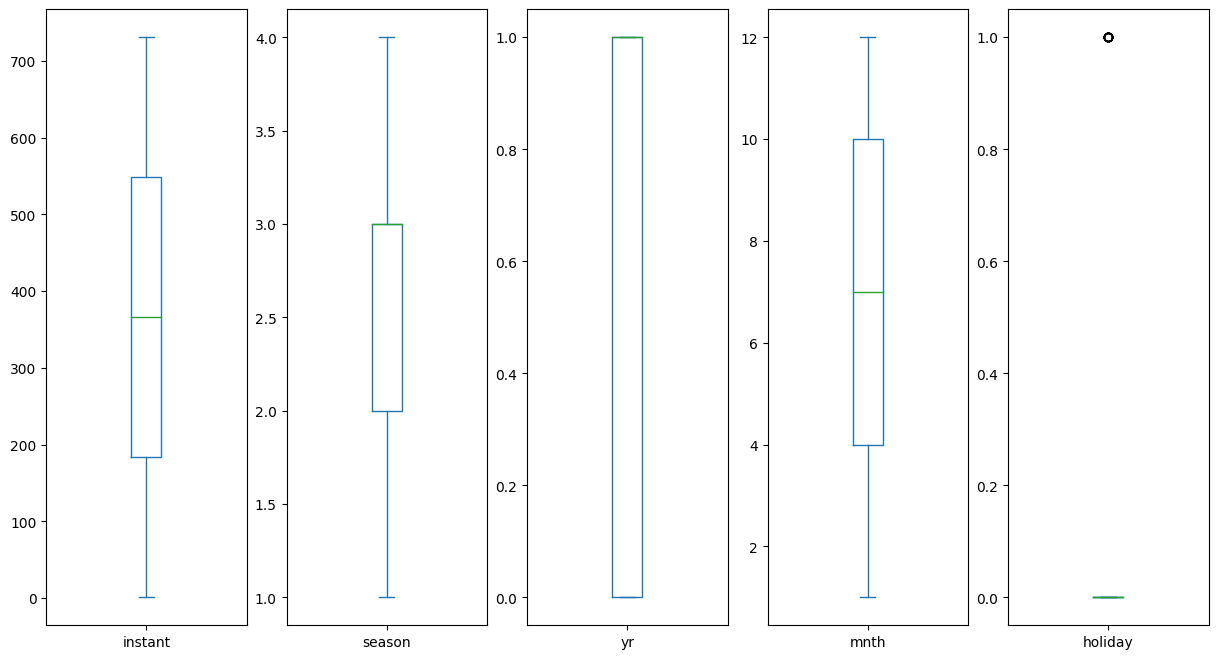

In [12]:
boxplot_outliers(gr_1)

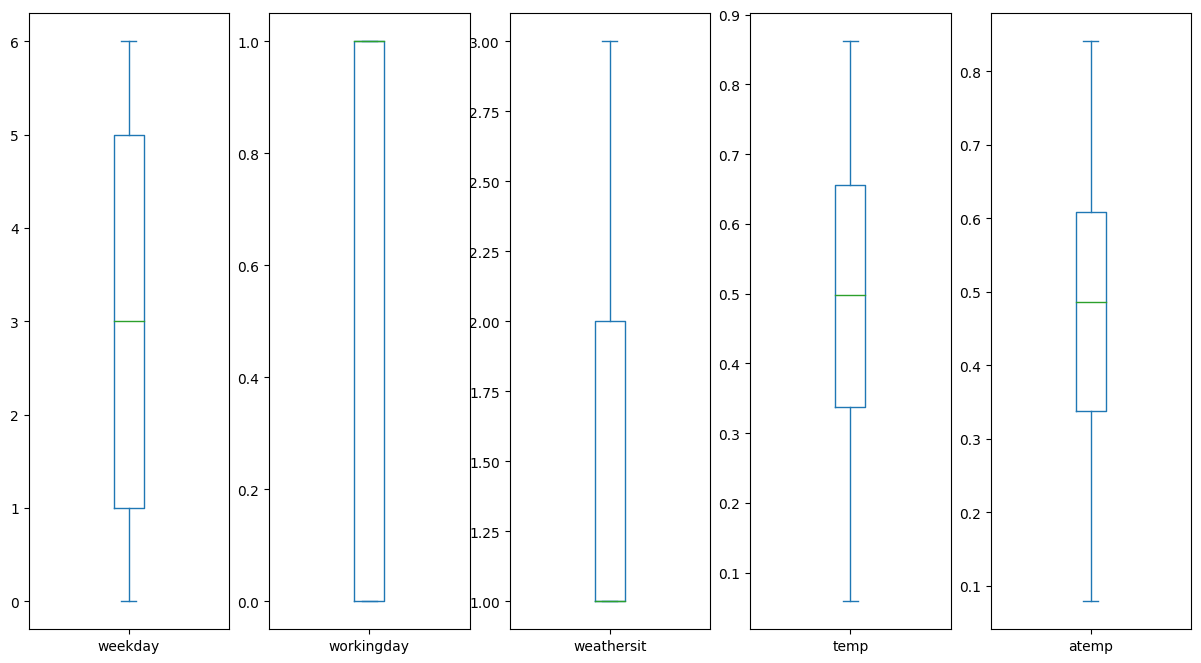

In [13]:
boxplot_outliers(gr_2)

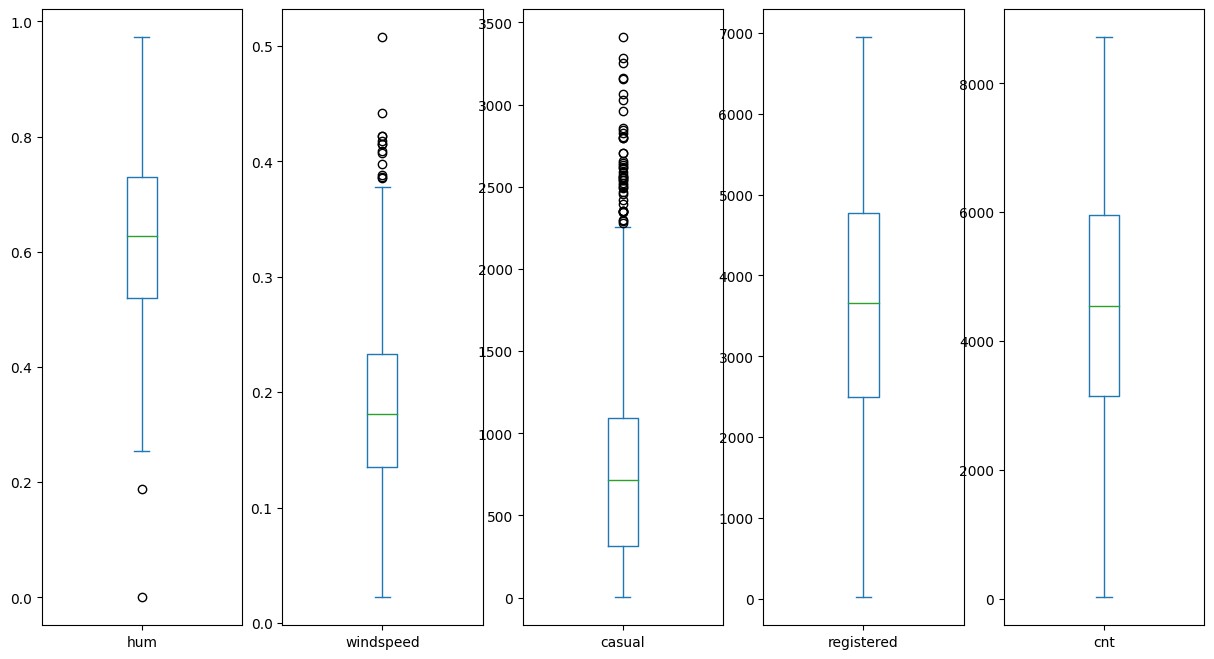

In [14]:
boxplot_outliers(gr_3)

In [15]:
# We can see that the outliers are place in windspeed, casual, hum
df.holiday.value_counts()

0    710
1     21
Name: holiday, dtype: int64

In [16]:
# Removal of Outliers: Using IQR, we can follow the below approach to replace the outliers with a NULL value:

# 1. Calculate the first and third quartile (Q1 and Q3).
# 2. Further, evaluate the interquartile range, IQR = Q3-Q1.
# 3. Estimate the lower bound, the lower bound = Q1*1.5
# 4. Estimate the upper bound, upper bound = Q3*1.5
# 5. Replace the data points that lie outside of the lower and the upper bound with a NULL value.

# Let's create the function:

def removing_outliers(columns_with_outliers):

  for x in [columns_with_outliers]:
    
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr) # Upper bound
    min = q25-(1.5*intr_qr) # Lower bound
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [17]:
# Applying the function to windspeed
removing_outliers("windspeed")

In [18]:
# Applying the function to casual
removing_outliers("casual")

In [19]:
# Applying the function to hum
removing_outliers("hum")

In [20]:
# Checking Nan
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64

In [21]:
# Checking the percentage of data which is non representative
np.around(df.isnull().sum()/len(df)*100, 2)

instant       0.00
dteday        0.00
season        0.00
yr            0.00
mnth          0.00
holiday       0.00
weekday       0.00
workingday    0.00
weathersit    0.00
temp          0.00
atemp         0.00
hum           0.27
windspeed     1.78
casual        6.02
registered    0.00
cnt           0.00
dtype: float64

In [22]:
# As we can see here, the percentages, won't go further than 7%, so we can just remove them

df.dropna(axis=1, inplace = True)
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
registered    0
cnt           0
dtype: int64

In [ ]:
# Quick tutorial on how to remove outliers